In [3]:
import numpy as np
import struct

In [28]:
file_path = "./storage/rx_file_8.dat"
sample_size = 8
with open(file_path, 'rb') as f:
    # Read the binary data
    binary_data = f.read()

num_samples = len(binary_data) // sample_size


In [29]:
# Unpack the binary data into complex numbers
samples = []
for i in range(num_samples):
    # Extract real and imaginary parts from the binary data
    real_part, imag_part = struct.unpack('ff', binary_data[i * sample_size: (i + 1) * sample_size])
    # Create a complex number and append it to the list of samples
    samples.append(complex(real_part, imag_part))

In [30]:
samples = np.array(samples)

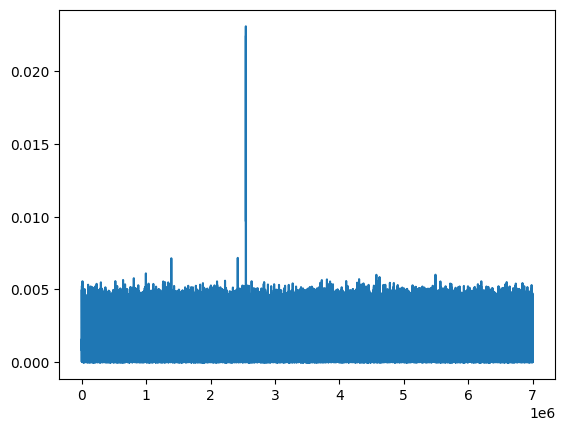

In [31]:
from matplotlib import pyplot as plt
plt.plot(np.abs(samples))

In [32]:
N = 257
M = 31
zfc_seq = np.array([np.exp(-1j * np.pi * M * n * (n + 1) / N) for n in range(N)])
print(zfc_seq.shape)
zfc_seq_rep = np.tile(zfc_seq, 3)
print(zfc_seq_rep.shape)

(257,)
(771,)


In [33]:
corr_zfc = np.correlate(samples, zfc_seq, mode='full')

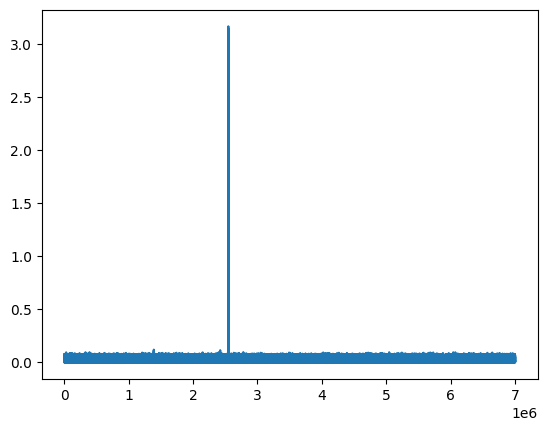

In [34]:
plt.plot(np.abs(corr_zfc))

[2547684 2547941 2548198 2548455 2548712 2548969 2549226 2549483 2549740
 2549997]
2547384 2550297


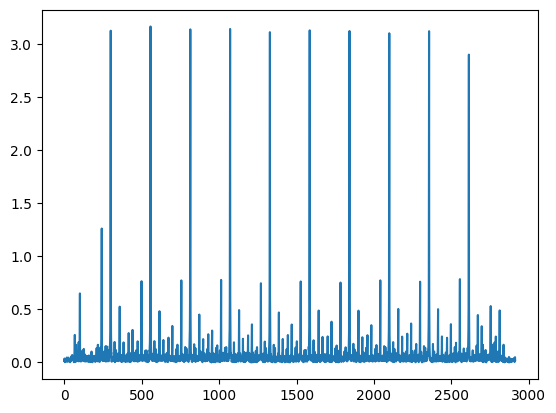

In [35]:
peaks = np.squeeze(np.argwhere(np.abs(corr_zfc) > 0.9*np.max(np.abs(corr_zfc))))
print(peaks)
p_min, p_max = np.min(peaks)-300, np.max(peaks) + 300
print(p_min, p_max)
plt.plot(np.abs(corr_zfc)[p_min : p_max])

In [73]:
corr_abs = np.abs(corr_zfc)
max_val = np.max(corr_abs)
peaks = np.argwhere(corr_abs > max_val*0.8)
print(peaks.shape)
print(peaks[-1])

(10, 1)
[3530930]


In [93]:
np.mean(np.abs(corr_zfc)[int(2.4e6):])

0.03642388769000378

In [94]:
np.max(np.abs(corr_zfc))

8.658554439552674

In [95]:
np.max(np.abs(corr_zfc))/np.mean(np.abs(corr_zfc)[int(2.4e6):])

237.7163721029411

In [74]:
np.mean(np.abs(corr_zfc))

0.036543072796942445